<a href="https://colab.research.google.com/github/priscilacc17/PRACTICAS_QUIMICA/blob/main/PC_CineticaQuimica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

In [ ]:
! pip install rdkit
! pip install pyscf

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

**REACTIVO**

In [ ]:
smiles = "F\C=C/C"
mol = Chem.MolFromSmiles(smiles)

In [ ]:
mol_h = Chem.AddHs(mol)

In [ ]:
Chem.AllChem.EmbedMolecule(mol_h)
print(Chem.MolToMolBlock(mol_h))


     RDKit          3D

  9  8  0  0  0  0  0  0  0  0999 V2000
    1.2054    1.4943    0.3023 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.3354    0.1610    0.0473 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2366   -0.5703   -0.1058 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0800    0.0987    0.0080 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.3292   -0.3029   -0.0306 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.3274   -1.6516   -0.3128 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8777   -0.6568   -0.1978 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1897    0.9418   -0.7340 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2865    0.4859    1.0233 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  2  5  1  0
  3  6  1  0
  4  7  1  0
  4  8  1  0
  4  9  1  0
M  END



In [ ]:
Chem.MolToXYZFile(mol_h,"reactivo.xyz")

In [ ]:
from pyscf import gto, scf

In [ ]:
mol = gto.M(atom="reactivo.xyz")
mol.basis = "3-21G"
mf = mol.KS()
mf.xc = 'b3lyp'

reactivo = mf.kernel()

converged SCF energy = -214.251782748994


**Energía de reactivo:**

In [ ]:
print(reactivo)

-214.25178274899406


**PRODUCTO**

In [ ]:
smiles1 = "F/C=C/C"
mol1 = Chem.MolFromSmiles(smiles1)
mol_h1 = Chem.AddHs(mol1)

In [ ]:
Chem.AllChem.EmbedMolecule(mol_h1)
print(Chem.MolToMolBlock(mol_h1))


     RDKit          3D

  9  8  0  0  0  0  0  0  0  0999 V2000
    2.5521    0.1997   -0.1254 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.3025   -0.2765    0.0241 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2403    0.5048   -0.1164 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1050   -0.0831    0.0615 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1335   -1.3170    0.2645 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.3245    1.5700   -0.3595 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2100   -1.0785   -0.4260 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3775   -0.0907    1.1314 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8604    0.5713   -0.4542 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  2  5  1  0
  3  6  1  0
  4  7  1  0
  4  8  1  0
  4  9  1  0
M  END



In [ ]:
Chem.MolToXYZFile(mol_h1,"producto.xyz")

In [ ]:
mol1 = gto.M(atom="producto.xyz")
mol1.basis = "3-21G"
mf1 = mol1.KS()
mf1.xc = 'b3lyp'
producto = mf1.kernel()

converged SCF energy = -214.250240551384


**Energía de producto:**

In [ ]:
print(producto)

-214.2502405513835


**ENERGÍA DEL COMPUESTO DE TRANSICIÓN**



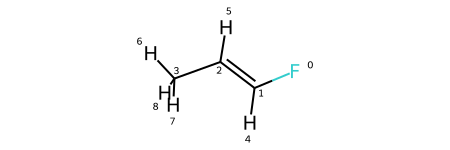

In [ ]:
smiles2 = "F/C=C/C"
mol2 = Chem.MolFromSmiles(smiles2)
mol2 = Chem.AddHs(mol2)
Chem.AllChem.EmbedMolecule(mol2)
Chem.MolToXYZFile(mol2, "initial2.xyz")
mol2

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [ ]:
Chem.AllChem.SetDihedralDeg(mol2.GetConformer(0),3,2,1,0,90)
Chem.MolToXYZFile(mol2, "90.xyz")

In [ ]:
mol2 = gto.M(atom="90.xyz")
mol2.basis = "3-21G"
mt = mol2.KS()
mt.xc = 'b3lyp'
transicion = mt.kernel()

converged SCF energy = -214.080248970443


**Energía del compuesto de transición:**

In [ ]:
print(transicion)

-214.080248970443


**ENERGIA DE ACTIVACIÓN PARA LA REACCIÓN DE ISOMERIZACIÓN O ENERGIA DE ISOMERIZACIÓN**

In [ ]:
isomerizacion=transicion-reactivo
print(isomerizacion)

0.17153377855106555


**INDICAR SI LA REACCIÓN ES ENDOTÉRMICA O EXOTÉRMICA**

**Energia de entalpia**

In [ ]:
entalpia=producto-reactivo
print(entalpia)

0.0015421976105471913


In [ ]:
if(entalpia>0):
  print("Reacción endotermica")
elif(entalpia<0):
  print("Reacción exotermica")

Reacción endotermica
